In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib notebook
# Provided data from the table
voltages = np.array([5.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -5.0])  # Voltage in volts
currents_ma = np.array([6.70, 4.01, 2.67, 1.33, 0.01, -1.34, -2.67, -4.01, -6.69])  # Current in milliamps

# Convert currents to amps for calculation
currents = currents_ma / 1000  # Convert milliamps to amps

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(voltages, currents)

# Plotting data points
plt.figure()
plt.scatter(voltages, currents * 1000, color='blue', label='Measured Data')  # Plotting in mA for clarity

# Plotting the line of best fit
plt.plot(voltages, (intercept + slope*voltages) * 1000, 'r', label=f'Best Fit Line: I(mA) = {slope*1000:.3f}V + {intercept*1000:.3f}')

# Adding labels and title
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('750$\Omega$ Resistor Recorded Data')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()

# Calculating resistor value in kiloohms
resistance_kohm = -1 / slope / 1000  # Resistance in kiloohms

# Calculate percent error compared to a nominal value, assuming 1 kOhm as nominal
nominal_resistance = 1  # Nominal resistance in kOhm
percent_error = (abs(resistance_kohm - nominal_resistance) / nominal_resistance) * 100

resistance_kohm, percent_error


<>:25: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_24827/3535429572.py:25: SyntaxWarning: invalid escape sequence '\O'
  plt.title('750$\Omega$ Resistor Recorded Data')


<IPython.core.display.Javascript object>

(np.float64(-0.7474128018397854), np.float64(174.74128018397855))

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data for Red LED
voltages = np.array([5, 4, 3, 2, 1.0, 0, -1, -2, -3])  # Voltage in volts
currents_ma = np.array([14.67, 9.88, 5.21, 0.86, 0.00, 0.00, 0.00, 0.00, 0.00])  # Current in milliamps

# Convert currents to amps for calculation
currents = currents_ma / 1000  # Convert milliamps to amps

# Function to fit (exponential growth)
def exp_func(v, I0, Vt):
    return I0 * (np.exp(v / Vt) - 1)

# Filter out the negative voltages for fitting the exponential function to only forward biased data
positive_voltages = voltages[voltages >= 0]
positive_currents = currents[voltages >= 0]

# Initial guesses for fitting parameters
initial_guesses = [1e-3, 1]  # I0 initial guess, Vt initial guess

# Fit the exponential function to the data
popt, pcov = curve_fit(exp_func, positive_voltages, positive_currents, p0=initial_guesses, maxfev=10000)

# Generate values for the fitted curve using positive voltages
fitted_voltages = np.linspace(0, max(positive_voltages), 100)
fitted_currents = exp_func(fitted_voltages, *popt)

# Plotting using Matplotlib only
plt.figure(figsize=(10, 6))

# Plot measured data
plt.scatter(positive_voltages, positive_currents * 1000, color='blue', label='Measured Data (Positive Voltages)')  # Plotting in mA

# Define the fitted curve equation for the label
fitted_curve_label = f'Fitted Exponential Curve: $I(V) = {popt[0]:.3e} \\times (e^{{V/{popt[1]:.3f}}} - 1)$'

# Plot the fitted exponential curve using the original measured voltages
plt.plot(fitted_voltages, fitted_currents * 1000, color='red', label=fitted_curve_label)

# Labels, title, and grid
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('Red LED I-V Characteristics')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the parameters of the fit
popt


array([1.47295525e-03, 2.06374241e+00])

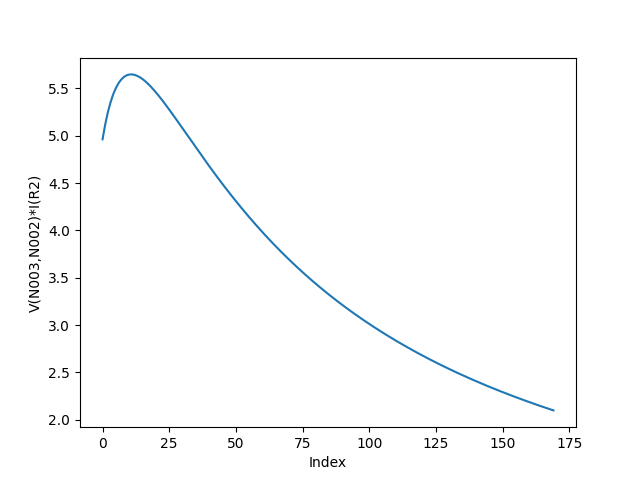

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

power_df = pd.read_csv(r'/home/art/Documents/LTspice/Draft3.txt', sep=r'\s+')
power_df.head()

data = power_df['V(N003,N002)*I(R2)']

fig, ax = plt.subplots()
ax.plot(data)
plt.xlabel('Index')
plt.ylabel('V(N003,N002)*I(R2)')
plt.show()